# Supervised Learning Algorithm

Supervised learning is where you have input variables (x) and an output variable (Y) and you use an algorithm to learn the mapping function from the input to the output.

Y = f(X)

The goal is to approximate the mapping function so well that when you have new input data (x) that you can predict the output variables (Y) for that data.

1) Classification: A classification problem is when the output variable is a category, such as “red” or “blue” or “disease” and “no disease”.
2) Regression: A regression problem is when the output variable is a real value, such as “dollars” or “weight”.

## Linear Regression with One Variable

Here we will implement linear regression with one variable to predict the scores of a student if he/she studies for a particular hour per day.

The file contains the dataset for our linear regression exercise.The first column is 'Hours' and second the 'Scores'.
First, as with doing any machine learning task, we need to import certain libraries.

## Reading and Plotting the data

Before starting on any task, it is often useful to understand the data by visualizing it. For this dataset, you can use a scatter plot to visualize the data, since it has only two properties to plot(Many other problems that you will encounter in real life are multi-dimensional and can’t be plotted on a 2-d plot. To create multidimensional plots you have to be creative in using various aesthetics like colors, shapes, depths, etc).


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Here we used the pandas read_csv function to read the comma separated values. Also, we have used the head function to view the first few rows of our data.

In [6]:
data = pd.read_csv(r"C:\Users\hp\Downloads\student_scores - student_scores.csv.txt")

In [7]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [8]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [9]:
data.shape

(25, 2)

In [10]:
X = data.iloc[:,0] # read first column
y = data.iloc[:,1] # read second column
m = len(y) # number of training example
data.head() 

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


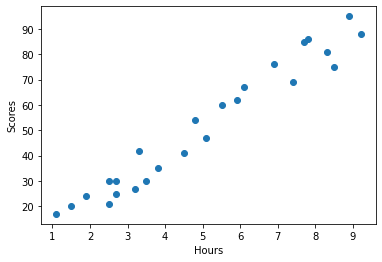

In [11]:
plt.scatter(X, y)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.show()

## Adding the intercept term

In the following lines, we add another dimension to our data to accommodate the intercept term (the reason for doing this is explained in the videos). We also initialize the initial parameters theta to 0 and the learning rate alpha to 0.01

In [12]:
X = X[:,np.newaxis]
y = y[:,np.newaxis]
theta = np.zeros([2,1])
iterations = 2000
alpha = 0.01
ones = np.ones((m,1))
X = np.hstack((ones, X))

## Computing the cost

In [17]:
def computeCost(X, y, theta):
    temp = np.dot(X, theta) - y
    return np.sum(np.power(temp, 2)) / (2*m)
J = computeCost(X, y, theta)
print(J)

14.441611913827462


You should expect to see a cost of 14.441611913827462

## Finding the optimal parameters using Gradient Descent

In [14]:
def gradientDescent(X, y, theta, alpha, iterations):
    for _ in range(iterations):
        temp = np.dot(X, theta) - y
        temp = np.dot(X.T, temp)
        theta = theta - (alpha/m) * temp
    return theta
theta = gradientDescent(X, y, theta, alpha, iterations)
print(theta)

[[2.43349919]
 [9.78390231]]


We now have the optimized value of theta . Use this value in the above cost function.

In [18]:
J = computeCost(X, y, theta)
print(J)

14.441611913827462


# Plot showing the best fit line

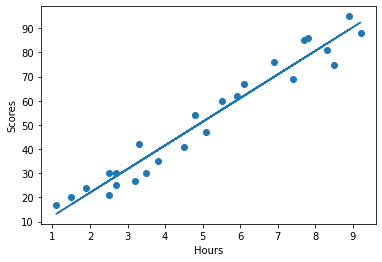

In [19]:
plt.scatter(X[:,1], y)
plt.xlabel('Hours')
plt.ylabel('Scores')
plt.plot(X[:,1], np.dot(X, theta))
plt.show()